<a href="https://colab.research.google.com/github/jgibbons94/cse480-notebooks/blob/master/08_2_Ponder_and_Prove_Turing_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

## TODO Study Examples

In the folders

[Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs](https://github.com/ganeshutah/Jove/blob/master/For_CS3100_Fall2020/17_DTMs_and_NDTMs/CH13-Asg8.ipynb)

and 

[Jove/For_CS3100_Fall2020/18_More_TM_Exs](https://github.com/ganeshutah/Jove/blob/master/For_CS3100_Fall2020/18_More_TM_Exs/More_TM_Exs.ipynb)

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

## TODO Write a Summary

Describe what you learned about TMs of both varieties.

## DONE Create a DTM to Delete a Character

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


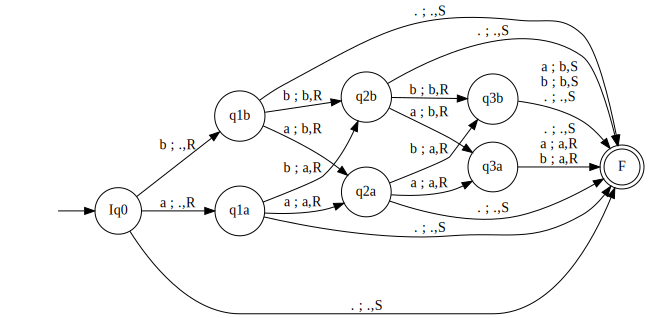

In [36]:
wpw_tm = md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! For strings length >=4, delete the fourth character, then shift first three
!! characters 1 cell right
!! For strings length <4, delete the last character, then shift entire remaining
!! string 1 cell right.
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------
!!First three states: Iq0, q1, q2 do nothing.

Iq0: a; ., R -> q1a
Iq0: b; ., R -> q1b
Iq0: .; ., S -> F

q1a: a; a, R-> q2a
q1a: b; a, R-> q2b
q1a: .; ., S->F

q1b: a; b, R-> q2a
q1b: b; b, R-> q2b
q1b: .; ., S->F

q2a: a; a, R-> q3a
q2a: b; a, R-> q3b
q2a: .; ., S->F

q2b: a; b, R-> q3a
q2b: b; b, R-> q3b
q2b: .; ., S->F

q3a: a; a, R->F
q3a: b; a, R->F
q3a: .; ., S->F

q3b: a; b, S->F
q3b: b; b, S->F
q3b: .; ., S->F


!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!---------------------------------------------------------------------------

'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [37]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

## DONE Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


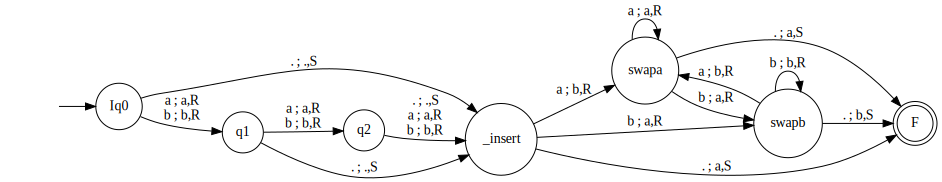

In [26]:
wpw_tm = md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! For strings length >=4, insert the inverse of the fourth character,
!! then copy each character 1 cell right
!! For strings length <4, insert 'a' at the end of the string.
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------
!!First three states: Iq0, q1, q2 do nothing.

Iq0: a; a, R -> q1
Iq0: b; b, R -> q1
Iq0: .; ., S -> _insert

q1: a; a, R -> q2
q1: b; b, R -> q2
q1: .; ., S -> _insert

q2: a; a, R -> _insert
q2: b; b, R -> _insert
q2: .; ., S -> _insert

_insert: a; b, R -> swapa
_insert: b; a, R -> swapb
_insert: .; a, S -> F

swapa: a; a, R-> swapa
swapa: b; a, R-> swapb
swapa: .; a, S-> F

swapb: a; b, R-> swapa
swapb: b; b, R-> swapb
swapb: .; b, S-> F






!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!---------------------------------------------------------------------------

'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [27]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

## TODO Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

## DONE Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [ ]:
def tep1(x):
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

1
1
1
1
1


Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [ ]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

1


# TODO Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.
